### Task
Classify Black_Friday_sale.csv file using K-means clustering

1.Find the buyer's age group and their product of interest

2.Which Product category has the highest sales

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel("C://Users//navs9//Downloads//Black_friday_sale.xlsx")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [14]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [3]:
len(df['User_ID'].unique()), len(df['Product_ID'].unique())

(5891, 3631)

In [15]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [4]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [5]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [6]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [12]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [19]:
df1 = pd.read_excel("C://Users//navs9//Downloads//Black_friday_sale.xlsx")

In [91]:
df2 = pd.read_excel("C://Users//navs9//Downloads//Black_friday_sale.xlsx")

In [20]:
PC2_null_percent = (df1['Product_Category_2'].isnull().sum()/len(df))*100
PC2_null_percent

31.56664266963357

In [21]:
PC3_null_percent = (df1['Product_Category_3'].isnull().sum()/len(df))*100
PC3_null_percent

69.67265865311198

In [63]:
# most of the rows in 'Product_Category_2' and 'Product_Category_3' are null, so dropping these columns.
df1.drop('Product_Category_2',axis=1,inplace=True)
df1.drop('Product_Category_3',axis=1,inplace=True)

In [92]:
df2.drop('Product_Category_2',axis=1,inplace=True)
df2.drop('Product_Category_3',axis=1,inplace=True)

In [64]:
df1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


### Data preprocessing 

In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [23]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [66]:
df1['Age']=l.fit_transform(df1['Age'])
df1['Age']

0         0
1         0
2         0
3         0
4         6
         ..
550063    5
550064    2
550065    2
550066    6
550067    4
Name: Age, Length: 550068, dtype: int32

In [93]:
df2['Age_encoded']=l.fit_transform(df2['Age'])
df2['Age_encoded']

0         0
1         0
2         0
3         0
4         6
         ..
550063    5
550064    2
550065    2
550066    6
550067    4
Name: Age_encoded, Length: 550068, dtype: int32

In [67]:
df1['Gender']=l.fit_transform(df1['Gender'])
df1['Gender']

0         0
1         0
2         0
3         0
4         1
         ..
550063    1
550064    0
550065    0
550066    0
550067    0
Name: Gender, Length: 550068, dtype: int32

In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  int32 
 3   Age                         550068 non-null  int32 
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int32(2), int64(5), object(3)
memory usage: 37.8+ MB


In [69]:
from sklearn.preprocessing import StandardScaler
# select required features for Clustering
#standarise numerical columns 
selected_col=['Age','Purchase']
scaler=StandardScaler()
s=scaler.fit_transform(df1[selected_col])
s

array([[-1.84424754, -0.1779729 ],
       [-1.84424754,  1.1817558 ],
       [-1.84424754, -1.56119326],
       ...,
       [-0.36673935, -1.81701338],
       [ 2.58827703, -1.77162273],
       [ 1.11076884, -1.7467375 ]])

In [ ]:
# finding out the optimum k value

X = df1[['Age', 'Purchase']]

inertia_values=[]
k = range(1,10)
for i in k:
    m = KMeans(n_clusters=i)
    m.fit(X)
    inertia_values.append(m.inertia_)

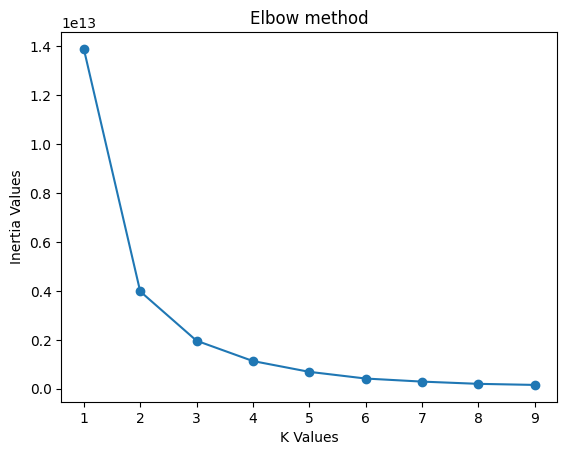

In [71]:
# finding the optium k value by plotting elbow method
plt.plot(k,inertia_values,marker='o')
plt.title("Elbow method")
plt.xlabel("K Values")
plt.ylabel("Inertia Values")

plt.show()

In [32]:
#choose k = 4

In [81]:
# applying K-Means clustering
k=4
kmeans=KMeans(n_clusters=4,random_state=0)
df1['cluster']=kmeans.fit_predict(df1[selected_col])

C:\Users\navs9\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [82]:
df1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,cluster
0,1000001,P00069042,0,0,10,A,2,0,3,8370,1
1,1000001,P00248942,0,0,10,A,2,0,1,15200,0
2,1000001,P00087842,0,0,10,A,2,0,12,1422,2
3,1000001,P00085442,0,0,10,A,2,0,12,1057,2
4,1000002,P00285442,1,6,16,C,4+,0,8,7969,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,5,13,B,1,1,20,368,2
550064,1006035,P00375436,0,2,1,C,3,0,20,371,2
550065,1006036,P00375436,0,2,15,B,4+,1,20,137,2
550066,1006038,P00375436,0,6,1,C,2,0,20,365,2


<Axes: xlabel='Age', ylabel='Purchase'>

C:\Users\navs9\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\navs9\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


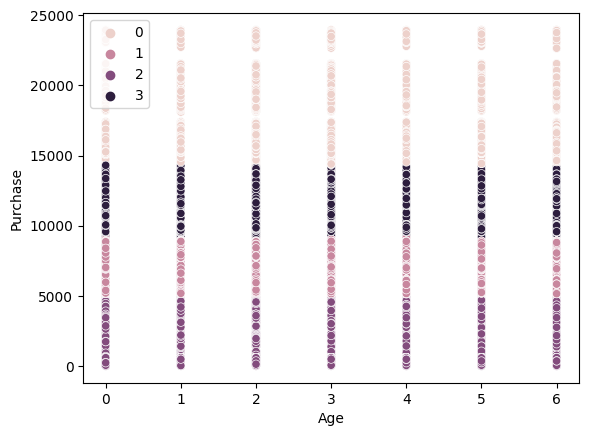

In [83]:
sns.scatterplot(data = X, x = 'Age', y = 'Purchase', hue = kmeans.labels_)

In [84]:
#cluster 0 has maximum sales
df1.cluster.value_counts()

cluster
1    236119
0    111210
3    107817
2     94922
Name: count, dtype: int64

In [85]:
df_new = df1[df1.cluster==0]
df_new

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,cluster
1,1000001,P00248942,0,0,10,A,2,0,1,15200,0
5,1000003,P00193542,1,2,15,A,3,0,1,15227,0
6,1000004,P00184942,1,4,7,B,2,1,1,19215,0
7,1000004,P00346142,1,4,7,B,2,1,1,15854,0
8,1000004,P0097242,1,4,7,B,2,1,1,15686,0
...,...,...,...,...,...,...,...,...,...,...,...
545864,1006036,P00111042,0,2,15,B,4+,1,15,21390,0
545865,1006036,P00152142,0,2,15,B,4+,1,7,16586,0
545882,1006036,P00270542,0,2,15,B,4+,1,1,15653,0
545904,1006040,P00081142,1,2,6,B,2,0,6,16493,0


### Question 1: Find the buyer's age group and their product of interest

In [86]:
# Analyzing clusters and finding age group and product of interest for each cluster
k=4
cluster_characteristics = []
for cluster_id in range(k):
    cluster_data = df1[df1['cluster']==cluster_id]
    
    dominant_age_group=cluster_data['Age'].mode()[0]
    product_of_interest=cluster_data['Product_ID'].mode()[0]
    
    cluster_characteristics.append({
        'Cluster': cluster_id,
        'Dominant_Age_Group': dominant_age_group,
        'Product_Of_Interest': product_of_interest
    })

cluster_characteristics_df1=pd.DataFrame(cluster_characteristics)
cluster_characteristics_df1

,Cluster,Dominant_Age_Group,Product_Of_Interest
0,0,2,P00025442
1,1,2,P00265242
2,2,2,P00102642
3,3,2,P00000142


In [90]:
#Finding the buyer's age group and their product of interest
print("Age group and their product Id are")
df1.groupby('Age')['Product_ID'].agg(pd.Series.mode).to_frame()

Age group and their product Id are


,Product_ID
Age,
0,P00255842
1,P00265242
2,P00265242
3,P00025442
4,P00265242
5,P00265242
6,P00265242


In [94]:
encoded_data = pd.DataFrame({'Age': df2['Age'], 'Age_encoded': df2['Age_encoded']})
# Printing the DataFrame
print(encoded_data)

          Age  Age_encoded
0        0-17            0
1        0-17            0
2        0-17            0
3        0-17            0
4         55+            6
...       ...          ...
550063  51-55            5
550064  26-35            2
550065  26-35            2
550066    55+            6
550067  46-50            4

[550068 rows x 2 columns]


### Question 2: Which Product category has the highest sales ?

In [95]:
df1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,cluster
0,1000001,P00069042,0,0,10,A,2,0,3,8370,1
1,1000001,P00248942,0,0,10,A,2,0,1,15200,0
2,1000001,P00087842,0,0,10,A,2,0,12,1422,2
3,1000001,P00085442,0,0,10,A,2,0,12,1057,2
4,1000002,P00285442,1,6,16,C,4+,0,8,7969,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,5,13,B,1,1,20,368,2
550064,1006035,P00375436,0,2,1,C,3,0,20,371,2
550065,1006036,P00375436,0,2,15,B,4+,1,20,137,2
550066,1006038,P00375436,0,6,1,C,2,0,20,365,2


In [96]:
#Product category with maximum sale
max_sales_category=df1.groupby('Product_Category_1')['Purchase'].sum().idxmax()
max_sales_value=df1.groupby('Product_Category_1')['Purchase'].sum().max()

print("Product Category with Highest Sales:", max_sales_category)
print("Highest Sales Value for this category:", max_sales_value)

Product Category with Highest Sales: 1
Highest Sales Value for this category: 1910013754


In [ ]:
#--The End--